# Machine Learning with a Heart (By P_A Team)
https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

* 0 represents no heart disease present
* 1 represents heart disease present

There are **13 features** + **patient_id** (unique and random identifier)

The list of features is:
* **slope_of_peak_exercise_st_segment** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* **resting_blood_pressure** (type: int): resting blood pressure
* **chest_pain_type** (type: int): chest pain type (4 values)
* **num_major_vessels** (type: int): number of major vessels (0-3) colored by flourosopy
* **fasting_blood_sugar_gt_120_mg_per_dl** (type: binary): fasting blood sugar > 120 mg/dl
* **resting_ekg_results** (type: int): resting electrocardiographic results (values 0,1,2)
* **serum_cholesterol_mg_per_dl** (type: int): serum cholestoral in mg/dl
* **oldpeak_eq_st_depression** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **sex** (type: binary): 0: female, 1: male
* **age** (type: int): age in years
* **max_heart_rate_achieved** (type: int): maximum heart rate achieved (beats per minute)
* **exercise_induced_angina** (type: binary): exercise-induced chest pain (0: False, 1: True)

## Performance Metric
Performance is evaluated according to binary **log loss**.
https://en.wikipedia.org/wiki/Loss_functions_for_classification#Cross_entropy_loss_(Log_Loss)

## 1. Important questions:
    1. Understand what are the meaning of the features...
    2. Feature Engineering --> I guess it could be very important to play with some features and see how they can interact --> Pere? We can ask him about it......
    
## Let's take a look to the dataset


In [1]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The train values, train labels and test values are in different datasets, **we will load evrything and merge it together in the same dataframe (with label = NaN for the test)**. In that way, all the treatment (means, outliers, ...) we do would be considering the entire dataset

In [2]:
# load the csv
train_values_df = pd.read_csv('train_values.csv') # Load the `train` file
train_labels_df = pd.read_csv('train_labels.csv') # Load the `train` file
test_values_df = pd.read_csv('test_values.csv') # Load the `train` file
test_ids = test_values_df['patient_id']
#store the original dimensions
len_train=train_values_df.shape[0]
len_test=test_values_df.shape[0]

# merge and concat the dataframes in one (NaNs for the test label)
heart_df= pd.concat([pd.merge(train_values_df, train_labels_df, on='patient_id'), test_values_df], sort=False)
heart_df.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                    0.0  
1                      158                        0                    0.0  
2                      162                        1                    1.0  
3                      181                        0                    1.0  
4                      145                        0                    0.0

Let's check number of pacients, if NaNs, duplicates, whatever,....

In [3]:
print('length of train: ', len_train)
print('length of test: ',len_test)
heart_df.describe()

length of train:  180
length of test:  90


slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         270.000000              270.000000   
mean                            1.585185              131.344444   
std                             0.614390               17.861608   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             2.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              200.000000   

       chest_pain_type  num_major_vessels  \
count       270.000000         270.000000   
mean          3.174074           0.670370   
std           0.950090           0.943896   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            270.000000           270.000000   
mean                               0.148148             1.022222   
std                                0.355906             0.997891   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   270.000000                 270.00000  270.000000   
mean                    249.659259                   1.05000    0.677778   
std                      51.686237                   1.14521    0.468195   
min                     126.000000                   0.00000    0.000000   
25%                     213.000000                   0.00000    0.000000   
50%                     245.000000                   0.80000    1.000000   
75%                     280.000000                   1.60000    1.000000   
max                     564.000000                   6.20000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  \
count  270.000000               270.000000               270.000000   
mean    54.433333               149.677778                 0.329630   
std      9.109067                23.165717                 0.470952   
min     29.000000                71.000000                 0.000000   
25%     48.000000               133.000000                 0.000000   
50%     55.000000               153.500000                 0.000000   
75%     61.000000               166.000000                 1.000000   
max     77.000000               202.000000                 1.000000   

       heart_disease_present  
count             180.000000  
mean                0.444444  
std                 0.498290  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [4]:
print ('Where are the null values: ',heart_df.isnull().any(), '\n ________________________________\n')
heart_df.isnull().sum()

Where are the null values:  patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
heart_disease_present                    True
dtype: bool 
 ________________________________



patient_id                               0
slope_of_peak_exercise_st_segment        0
thal                                     0
resting_blood_pressure                   0
chest_pain_type                          0
num_major_vessels                        0
fasting_blood_sugar_gt_120_mg_per_dl     0
resting_ekg_results                      0
serum_cholesterol_mg_per_dl              0
oldpeak_eq_st_depression                 0
sex                                      0
age                                      0
max_heart_rate_achieved                  0
exercise_induced_angina                  0
heart_disease_present                   90
dtype: int64

There aren't any NaNs (heart_disease_present with NaNs are the test data).  
Now check if there are any duplicate

In [5]:
ids = heart_df["patient_id"]
heart_df[ids.isin(ids[ids.duplicated()])]

Empty DataFrame
Columns: [patient_id, slope_of_peak_exercise_st_segment, thal, resting_blood_pressure, chest_pain_type, num_major_vessels, fasting_blood_sugar_gt_120_mg_per_dl, resting_ekg_results, serum_cholesterol_mg_per_dl, oldpeak_eq_st_depression, sex, age, max_heart_rate_achieved, exercise_induced_angina, heart_disease_present]
Index: []

There aren't any duplicates neither.
Let's see which are the values for each of the features:

In [6]:
print ('slope_of_peak_exercise_st_segment : ', heart_df.slope_of_peak_exercise_st_segment.unique(), '\n ________________________________\n')
print ('thal : ', heart_df.thal.unique(), '\n ________________________________\n')
print ('resting_blood_pressure : ', sorted(heart_df.resting_blood_pressure.unique()), '\n ________________________________\n')
print ('chest_pain_type : ', heart_df.chest_pain_type.unique(), '\n ________________________________\n')
print ('num_major_vessels : ', heart_df.num_major_vessels.unique(), '\n ________________________________\n')
print ('fasting_blood_sugar_gt_120_mg_per_dl : ', heart_df.fasting_blood_sugar_gt_120_mg_per_dl.unique(), '\n ________________________________\n')
print ('resting_ekg_results : ', heart_df.resting_ekg_results.unique(), '\n ________________________________\n')
print ('serum_cholesterol_mg_per_dl : ', sorted(heart_df.serum_cholesterol_mg_per_dl.unique()), '\n ________________________________\n')
print ('oldpeak_eq_st_depression : ', sorted(heart_df.oldpeak_eq_st_depression.unique()), '\n ________________________________\n')
print ('sex : ', heart_df.sex.unique(), '\n ________________________________\n')
print ('age : ', sorted(heart_df.age.unique()), '\n ________________________________\n')
print ('max_heart_rate_achieved : ', sorted(heart_df.max_heart_rate_achieved.unique()), '\n ________________________________\n')
print ('exercise_induced_angina : ', sorted(heart_df.exercise_induced_angina.unique()), '\n ________________________________\n')

slope_of_peak_exercise_st_segment :  [1 2 3] 
 ________________________________

thal :  ['normal' 'reversible_defect' 'fixed_defect'] 
 ________________________________

resting_blood_pressure :  [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 155, 156, 158, 160, 165, 170, 172, 174, 178, 180, 192, 200] 
 ________________________________

chest_pain_type :  [2 3 4 1] 
 ________________________________

num_major_vessels :  [0 3 2 1] 
 ________________________________

fasting_blood_sugar_gt_120_mg_per_dl :  [0 1] 
 ________________________________

resting_ekg_results :  [2 0 1] 
 ________________________________

serum_cholesterol_mg_per_dl :  [126, 141, 149, 160, 164, 166, 167, 168, 172, 174, 175, 177, 178, 180, 182, 183, 184, 185, 186, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

A lot of information:
    1. no NaNs
    2. no younger people than 29, oldets one is 77
    3. cholesterol moves between 126 and 564
    4. blood pressure at rest between 94 and 200
Can we eliminate some outliers? Or we must consider all of them?

Let's apply dummies and pass thal information to sparse table

In [7]:
heart_df_D=pd.get_dummies(heart_df, columns=['thal'])
print(heart_df_D.head())

  patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0     0z64un                                  1                     128   
1     ryoo3j                                  2                     110   
2     yt1s1x                                  1                     125   
3     l2xjde                                  1                     152   
4     oyt4ek                                  3                     178   

   chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                2                  0                                     0   
1                3                  0                                     0   
2                4                  3                                     0   
3                4                  0                                     0   
4                1                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depress

## Compare the histograms of train and test (is the dataset balanced?)
*Copiat Arnau Titanic.. ;P*

In [8]:
features_all = heart_df.columns.tolist()
print(features_all)

features_int=['slope_of_peak_exercise_st_segment','resting_blood_pressure', 'chest_pain_type', 
              'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
              'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved',
              'exercise_induced_angina']

['patient_id', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'heart_disease_present']


In [9]:
#histograms of train vs test dels int

def compare_dist(ax, feature, i=0):
    sns.kdeplot(train_values_df[feature], label="train", ax=ax)
    sns.kdeplot(test_values_df[feature], label="test", ax=ax)


def numeric_tile(plot_func):
    fig, axs = plt.subplots(3, 4, figsize=(24, 12))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_int)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=1.3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()

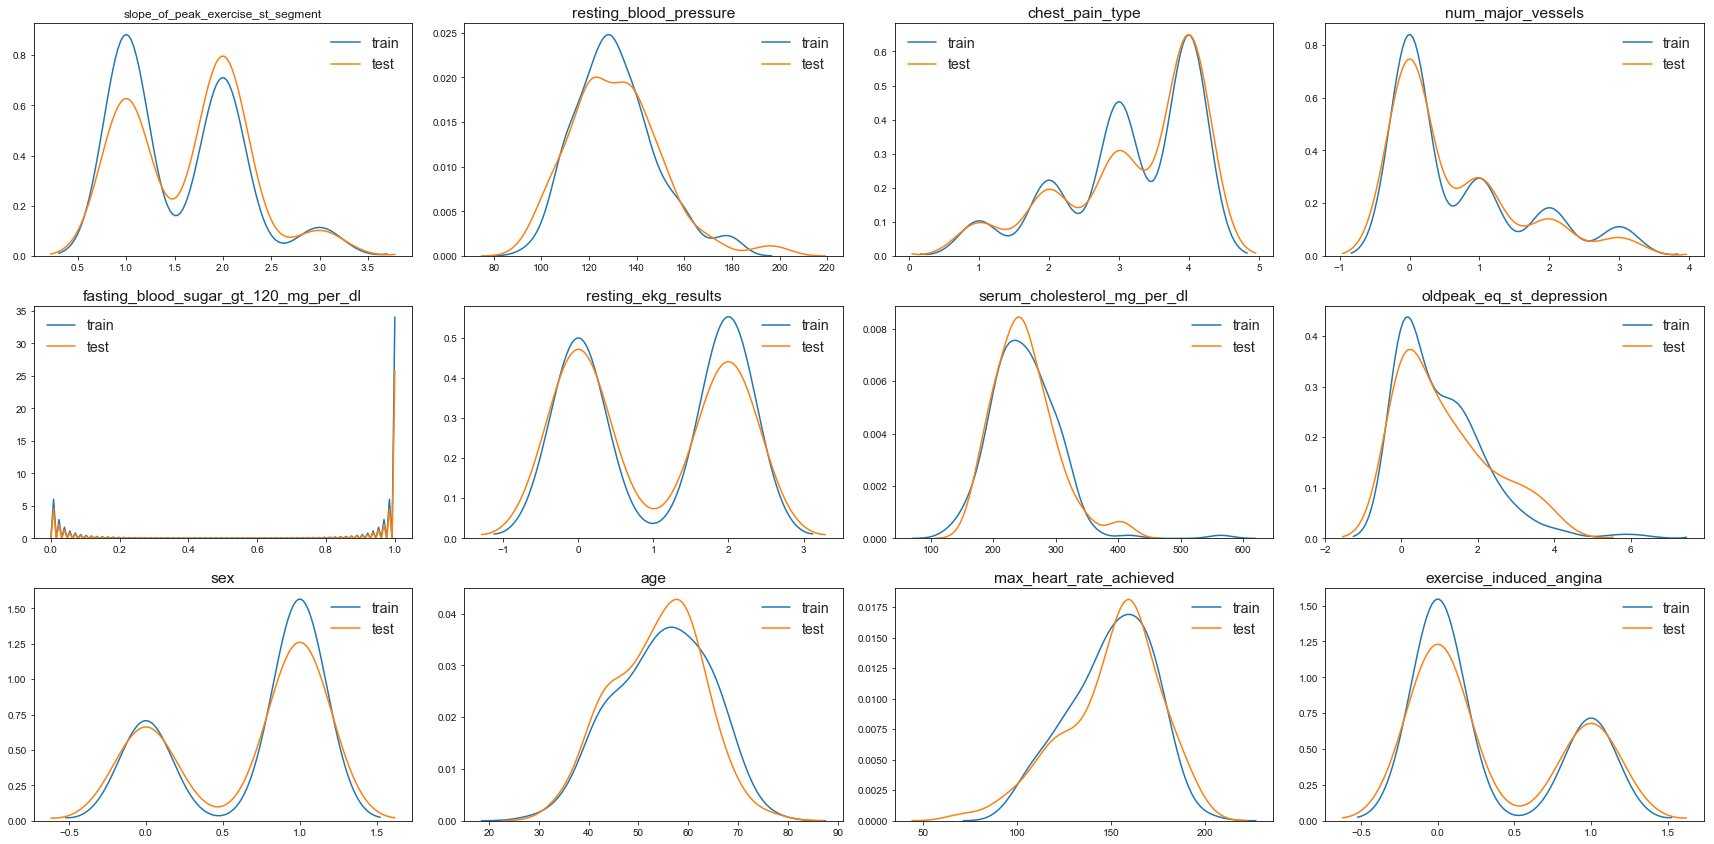

In [10]:
numeric_tile(compare_dist)

I love this images! we can see if both train and test are more or less similar. 
In general terms I would say that they are similar, so the train seems representative of the test (however, we will see if we can modify the train data somehow..)

## Let's take a look for the correlations....(in the training set)

In [11]:
cor=heart_df_D.corr()
print ('Training correlations (Pearson): \n', cor["heart_disease_present"].sort_values(ascending=False))

Training correlations (Pearson): 
 heart_disease_present                   1.000000
thal_reversible_defect                  0.525145
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
thal_fixed_defect                       0.024112
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
thal_normal                            -0.528812
Name: heart_disease_present, dtype: float64


All the correlation are positive (except max_heart_rate_achieved and thal_normal). All the rest shows higher correlation for thal_reversible_defect, exercice_induced_angina, num_major_vessels and chest_pain_type.
I am very surprised for the low correlation obsreved in: serum_cholesterol_mg_per_dl and serum_cholesterol_mg_per_dl
Could we improve this creating groups? (mean, high, suprhigh...?)

# Let's bin some of the features: resting blood pressure, age, serum_cholesterol_mg_per_dl, 
La idea de fer aixo es reduir la complexitat del model, eliminar informacio que no es util: veiem que l'edat te poc impacte, aixo potser es perque hi han masses valors, passa el mateix amb algunes variables que a priori semblarien molt necessaries...

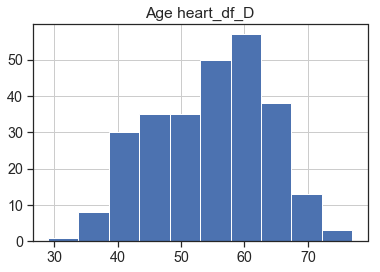

In [12]:
heart_df_D.age.hist()
plt.title('Age heart_df_D')
plt.show()

In [13]:
# en aquest bloc definim una columna categoritzant les edats
bins= [20,30,40,50,60,70,80]
labels = ['a20','a30','a40','a50','a60','a70']
heart_df_D['AgeGroup'] = pd.cut(heart_df_D['age'], bins=bins, labels=labels, right=False)
del heart_df_D['age']

In [14]:
heart_df_D.head()

patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0     0z64un                                  1                     128   
1     ryoo3j                                  2                     110   
2     yt1s1x                                  1                     125   
3     l2xjde                                  1                     152   
4     oyt4ek                                  3                     178   

   chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                2                  0                                     0   
1                3                  0                                     0   
2                4                  3                                     0   
3                4                  0                                     0   
4                1                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  \
0                    2                          308                       0.0   
1                    0                          214                       1.6   
2                    2                          304                       0.0   
3                    0                          223                       0.0   
4                    2                          270                       4.2   

   sex  max_heart_rate_achieved  exercise_induced_angina  \
0    1                      170                        0   
1    0                      158                        0   
2    1                      162                        1   
3    1                      181                        0   
4    1                      145                        0   

   heart_disease_present  thal_fixed_defect  thal_normal  \
0                    0.0                  0            1   
1                    0.0                  0            1   
2                    1.0                  0            1   
3                    1.0                  0            0   
4                    0.0                  0            0   

   thal_reversible_defect AgeGroup  
0                       0      a40  
1                       0      a50  
2                       0      a70  
3                       1      a40  
4                       1      a50

In [15]:
heart_df_D=pd.get_dummies(heart_df_D, columns=['AgeGroup'])

In [16]:
heart_df_D.head(10)

patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0     0z64un                                  1                     128   
1     ryoo3j                                  2                     110   
2     yt1s1x                                  1                     125   
3     l2xjde                                  1                     152   
4     oyt4ek                                  3                     178   
5     ldukkw                                  1                     130   
6     2gbyh9                                  2                     150   
7     daa9kp                                  2                     150   
8     3nwy2n                                  3                     170   
9     1r508r                                  2                     120   

   chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                2                  0                                     0   
1                3                  0                                     0   
2                4                  3                                     0   
3                4                  0                                     0   
4                1                  0                                     0   
5                3                  0                                     0   
6                4                  2                                     0   
7                4                  1                                     0   
8                4                  0                                     0   
9                3                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  \
0                    2                          308                       0.0   
1                    0                          214                       1.6   
2                    2                          304                       0.0   
3                    0                          223                       0.0   
4                    2                          270                       4.2   
5                    0                          180                       0.0   
6                    2                          258                       2.6   
7                    2                          276                       0.6   
8                    2                          326                       3.4   
9                    0                          219                       1.6   

   sex      ...       heart_disease_present  thal_fixed_defect  thal_normal  \
0    1      ...                         0.0                  0            1   
1    0      ...                         0.0                  0            1   
2    1      ...                         1.0                  0            1   
3    1      ...                         1.0                  0            0   
4    1      ...                         0.0                  0            0   
5    1      ...                         0.0                  0            1   
6    0      ...                         1.0                  0            0   
7    1      ...                         1.0                  1            0   
8    1      ...                         1.0                  0            0   
9    0      ...                         0.0                  0            1   

   thal_reversible_defect  AgeGroup_a20  AgeGroup_a30  AgeGroup_a40  \
0                       0             0             0             1   
1                       0             0             0             0   
2                       0             0             0             0   
3                       1             0             0             1   
4                       1             0             0             0   
5                       0             0             0             1   
6                       1             0        

Algo semlant per la resting blood pressure (va de 94 a 200), serum_cholesterol_mg_per_dl (126 a 564) i max_heart_rate_achieved (de 71 a 202)

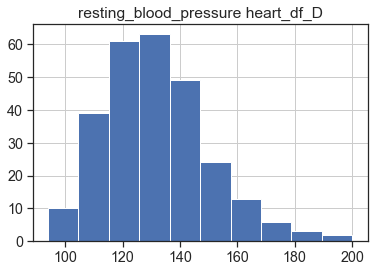

In [17]:
heart_df_D.resting_blood_pressure.hist()
plt.title('resting_blood_pressure heart_df_D')
plt.show()

In [18]:
# en aquest bloc definim una columna categoritzant les resting blood pressure
bins= [80,100,120,140,160,180,200]
labels = ['90','110','130','150','170','190']
heart_df_D['blood_press'] = pd.cut(heart_df_D['resting_blood_pressure'], bins=bins, labels=labels, right=False)
del heart_df_D['resting_blood_pressure']
heart_df_D=pd.get_dummies(heart_df_D, columns=['blood_press'])

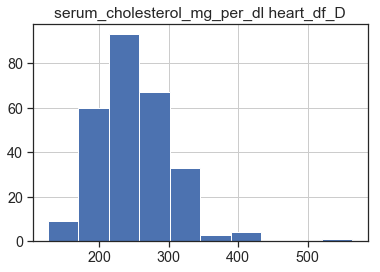

In [19]:
heart_df_D.serum_cholesterol_mg_per_dl.hist()
plt.title('serum_cholesterol_mg_per_dl heart_df_D')
plt.show()

In [20]:
# en aquest bloc definim una columna categoritzant el serum colesterol
bins= [120,180,240,300,360,420,580]
labels = ['140','210','270','330','390','500']
heart_df_D['Colesterol'] = pd.cut(heart_df_D['serum_cholesterol_mg_per_dl'], bins=bins, labels=labels, right=False)
del heart_df_D['serum_cholesterol_mg_per_dl']
heart_df_D=pd.get_dummies(heart_df_D, columns=['Colesterol'])

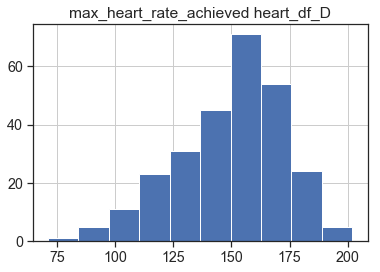

In [21]:
heart_df_D.max_heart_rate_achieved.hist()
plt.title('max_heart_rate_achieved heart_df_D')
plt.show()

In [22]:
# en aquest bloc definim una columna categoritzant el max_heart_rate_achieved
bins= [60,100,120,130,140,150,160,170,180,200]
labels = ['80','110','125','135','145','155','165','175','190']
heart_df_D['Max_heart'] = pd.cut(heart_df_D['max_heart_rate_achieved'], bins=bins, labels=labels, right=False)
del heart_df_D['max_heart_rate_achieved']
heart_df_D=pd.get_dummies(heart_df_D, columns=['Max_heart'])

In [23]:
cor=heart_df_D.corr()
print ('Training correlations (Pearson): \n', cor["heart_disease_present"].sort_values(ascending=False))

Training correlations (Pearson): 
 heart_disease_present                   1.000000
thal_reversible_defect                  0.525145
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
Max_heart_110                           0.231355
resting_ekg_results                     0.145933
Max_heart_80                            0.145556
AgeGroup_a60                            0.145263
Colesterol_270                          0.108270
Max_heart_135                           0.092987
Max_heart_145                           0.077743
Colesterol_330                          0.062622
blood_press_190                         0.058222
Max_heart_125                           0.053936
AgeGroup_a30                            0.051405
thal_fixed_defect                 

# Feature Engineering:
I si busquessim noves variables que tinguessin relacio amb heart_disease_present?

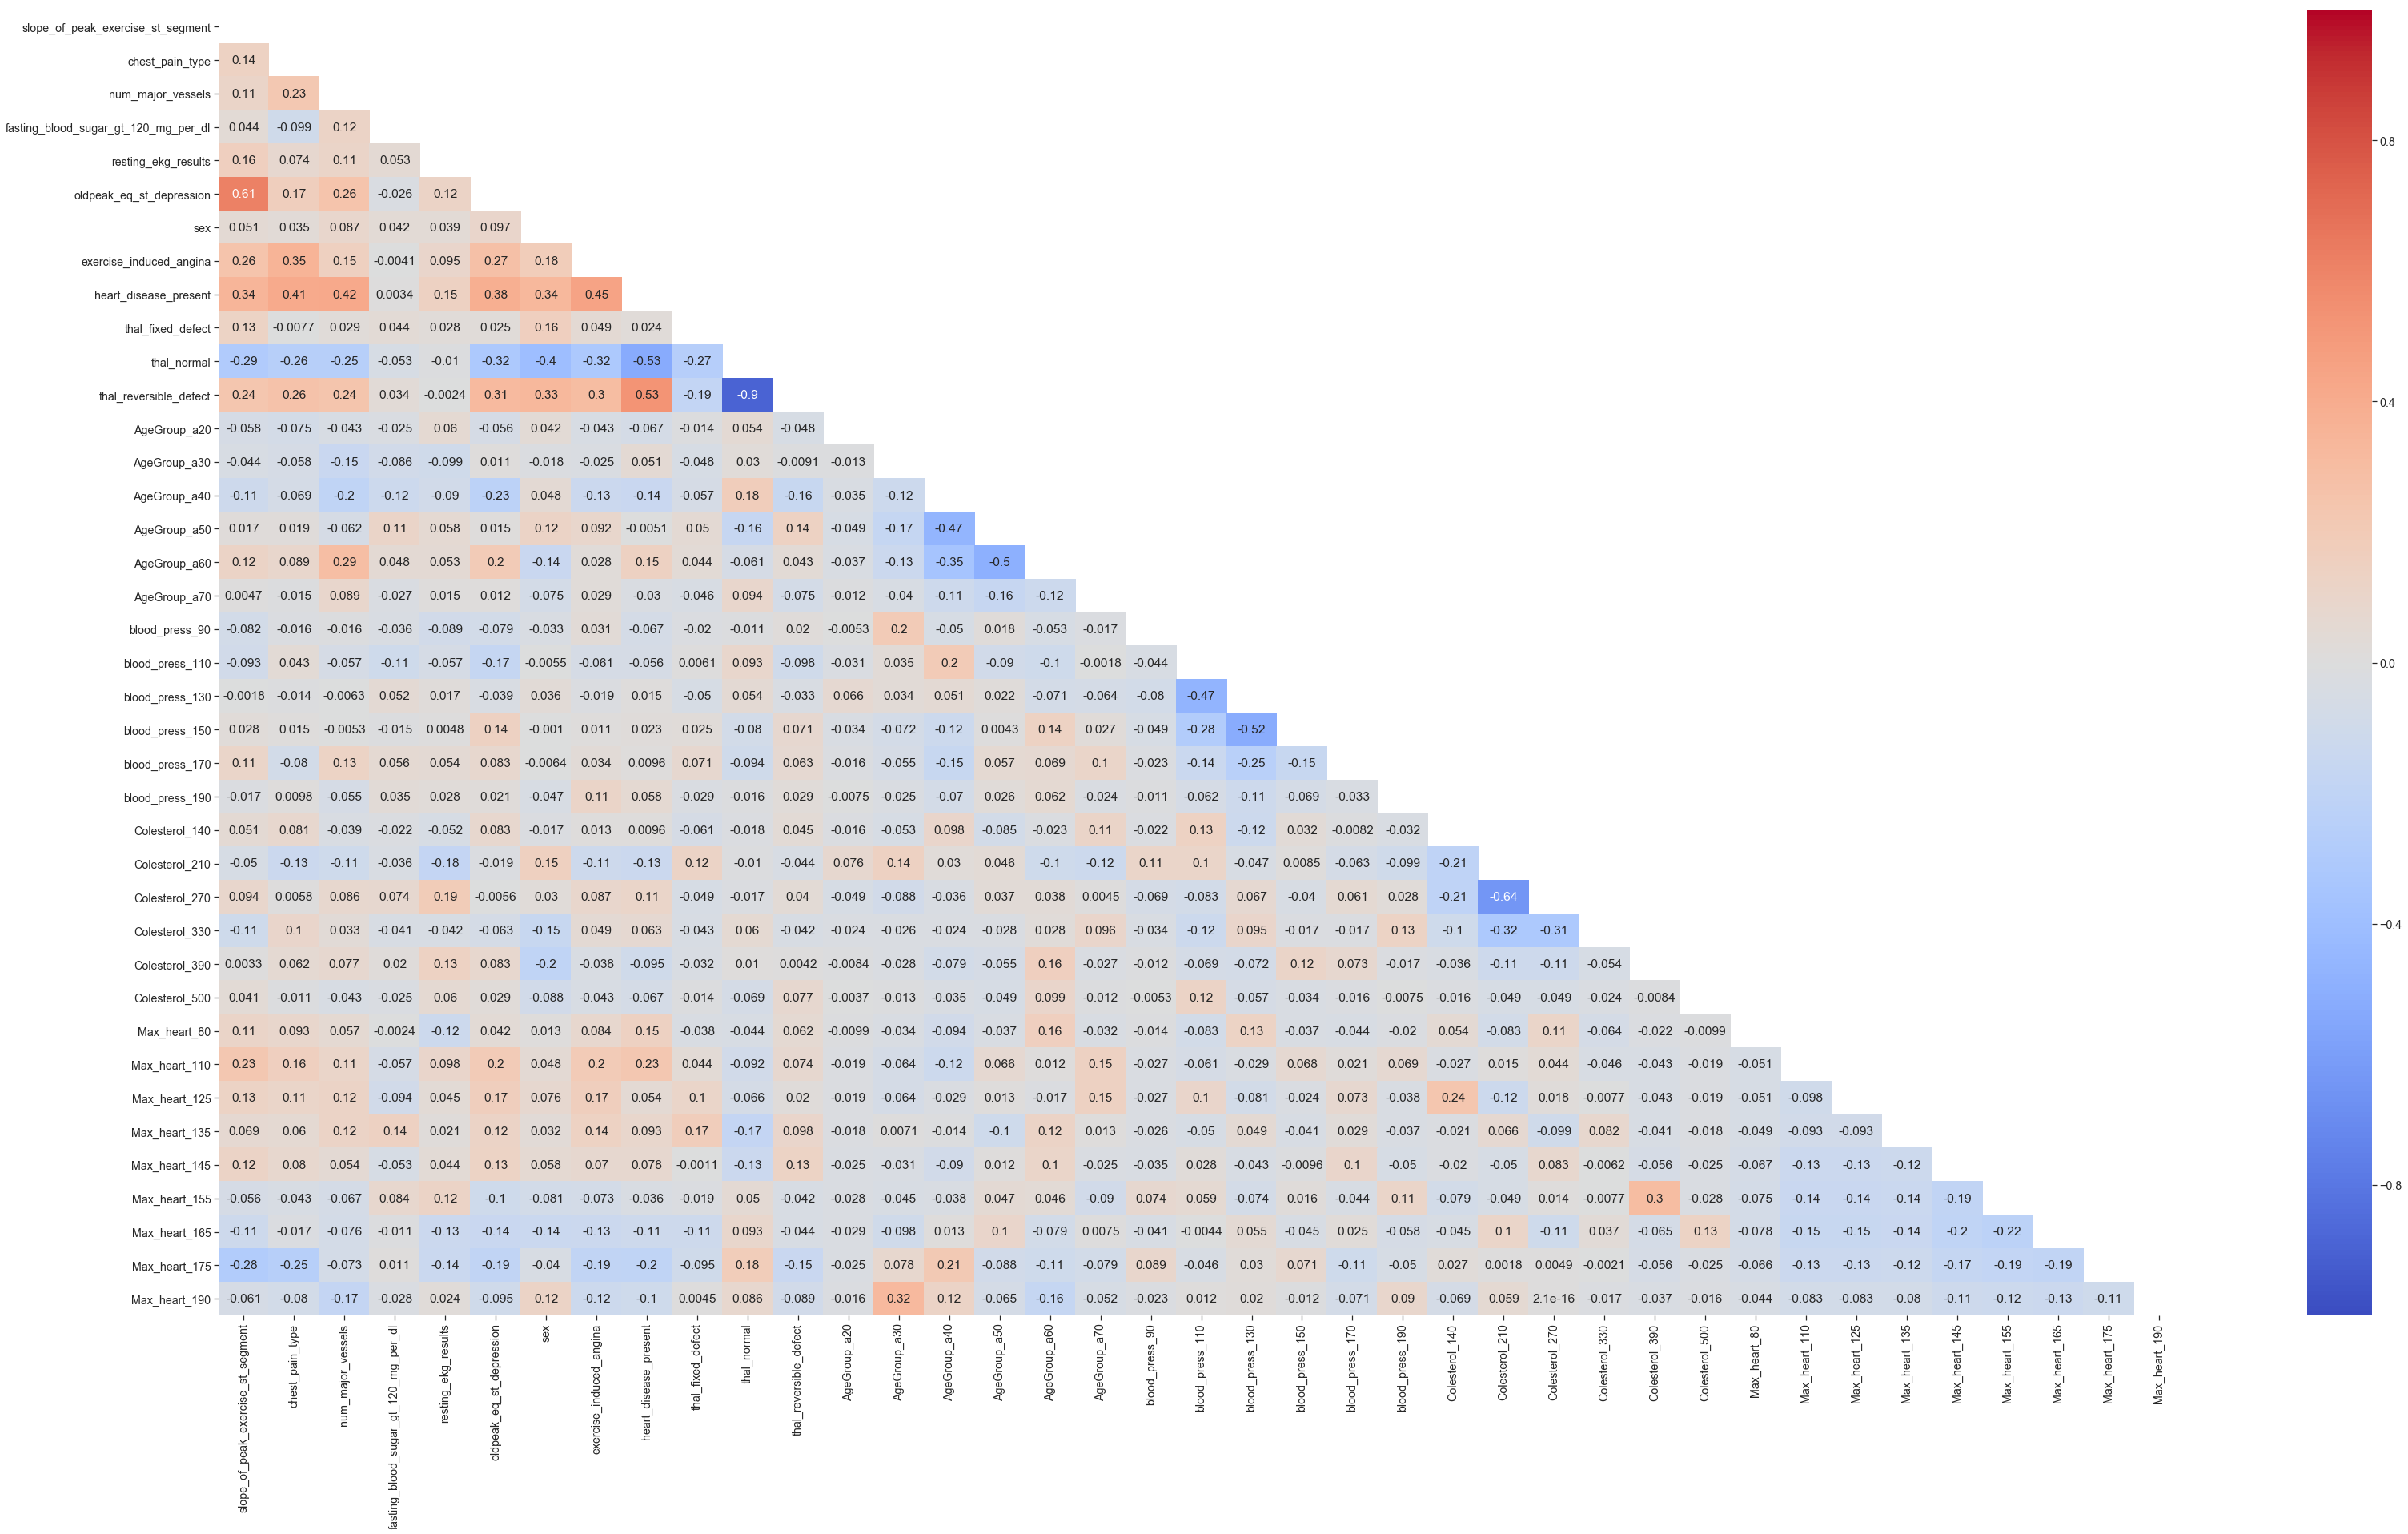

In [24]:
mask = np.zeros_like(heart_df_D.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(55,30))
sns.heatmap(heart_df_D.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

Aquesta figura es molt interessant, i ens mostra quines variables estan relacionades entre elles, 
1. Podriem crear noves variables a partir d'aquestes? sumant, multiplicant, dividint....

Resum relacions notables (>0.6):
1. oldpeak_eq_st_depression amb slope_of_peak_exercice amb 0.61
2. thai_reversible_effect amb thai_normal amb 0.9
3. Colesterol 270 amb colesterol 210?

n'hi han moltes mes amb correlacions mes altes de 0.3.....donar cop d'ull?

# Model application
## 1. hem de tornar a separar la part de training i de test, i despres ja podem fer proves amb models sobre el training

In [25]:
heart_df_D.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'chest_pain_type',
       'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl',
       'resting_ekg_results', 'oldpeak_eq_st_depression', 'sex',
       'exercise_induced_angina', 'heart_disease_present', 'thal_fixed_defect',
       'thal_normal', 'thal_reversible_defect', 'AgeGroup_a20', 'AgeGroup_a30',
       'AgeGroup_a40', 'AgeGroup_a50', 'AgeGroup_a60', 'AgeGroup_a70',
       'blood_press_90', 'blood_press_110', 'blood_press_130',
       'blood_press_150', 'blood_press_170', 'blood_press_190',
       'Colesterol_140', 'Colesterol_210', 'Colesterol_270', 'Colesterol_330',
       'Colesterol_390', 'Colesterol_500', 'Max_heart_80', 'Max_heart_110',
       'Max_heart_125', 'Max_heart_135', 'Max_heart_145', 'Max_heart_155',
       'Max_heart_165', 'Max_heart_175', 'Max_heart_190'],
      dtype='object')

In [26]:
# heart_df_D_1 eliminant  serum_cholesterol_mg_per_dl i resting_blood_pressure
#heart_df_D_1 = heart_df_D.drop(columns=['patient_id','fasting_blood_sugar_gt_120_mg_per_dl','thal_fixed_defect','AgeGroup_a50','AgeGroup_a70','Colesterol_140','blood_press_170','blood_press_130','blood_press_150','Max_heart_155','Max_heart_125','Max_heart_135','Max_heart_145','AgeGroup_a30','AgeGroup_a20','blood_press_190','blood_press_110','Colesterol_330','Colesterol_500','blood_press_90','Colesterol_390'])
#heart_df_D_1 = heart_df_D.drop(columns=['patient_id','fasting_blood_sugar_gt_120_mg_per_dl','thal_fixed_defect','AgeGroup_a50','AgeGroup_a70','Colesterol_140','blood_press_170','blood_press_130','blood_press_150','Max_heart_155','Max_heart_125','Max_heart_135','Max_heart_145','AgeGroup_a30','AgeGroup_a20','blood_press_190','blood_press_110','Colesterol_330','Colesterol_500','blood_press_90','Colesterol_390','Colesterol_270','Max_heart_190','Max_heart_165'])
heart_df_D_1 = heart_df_D.drop(columns=['patient_id','fasting_blood_sugar_gt_120_mg_per_dl','thal_fixed_defect','AgeGroup_a50','AgeGroup_a70','Colesterol_140','blood_press_170','blood_press_130','blood_press_150','Max_heart_155','Max_heart_125','Max_heart_135','Max_heart_145','AgeGroup_a30','AgeGroup_a20','blood_press_190','blood_press_110','Colesterol_330','Colesterol_500','blood_press_90','Colesterol_390','Colesterol_270','Max_heart_190','Max_heart_165','Colesterol_210','AgeGroup_a40'])

features_D_1 = heart_df_D_1.columns.tolist()
features_D_1.remove('heart_disease_present')

In [27]:
cor=heart_df_D_1.corr()
print ('Training correlations (Pearson): \n', cor["heart_disease_present"].sort_values(ascending=False))

Training correlations (Pearson): 
 heart_disease_present                1.000000
thal_reversible_defect               0.525145
exercise_induced_angina              0.448647
num_major_vessels                    0.421519
chest_pain_type                      0.412829
oldpeak_eq_st_depression             0.382930
slope_of_peak_exercise_st_segment    0.344224
sex                                  0.335421
Max_heart_110                        0.231355
resting_ekg_results                  0.145933
Max_heart_80                         0.145556
AgeGroup_a60                         0.145263
Max_heart_175                       -0.198798
thal_normal                         -0.528812
Name: heart_disease_present, dtype: float64


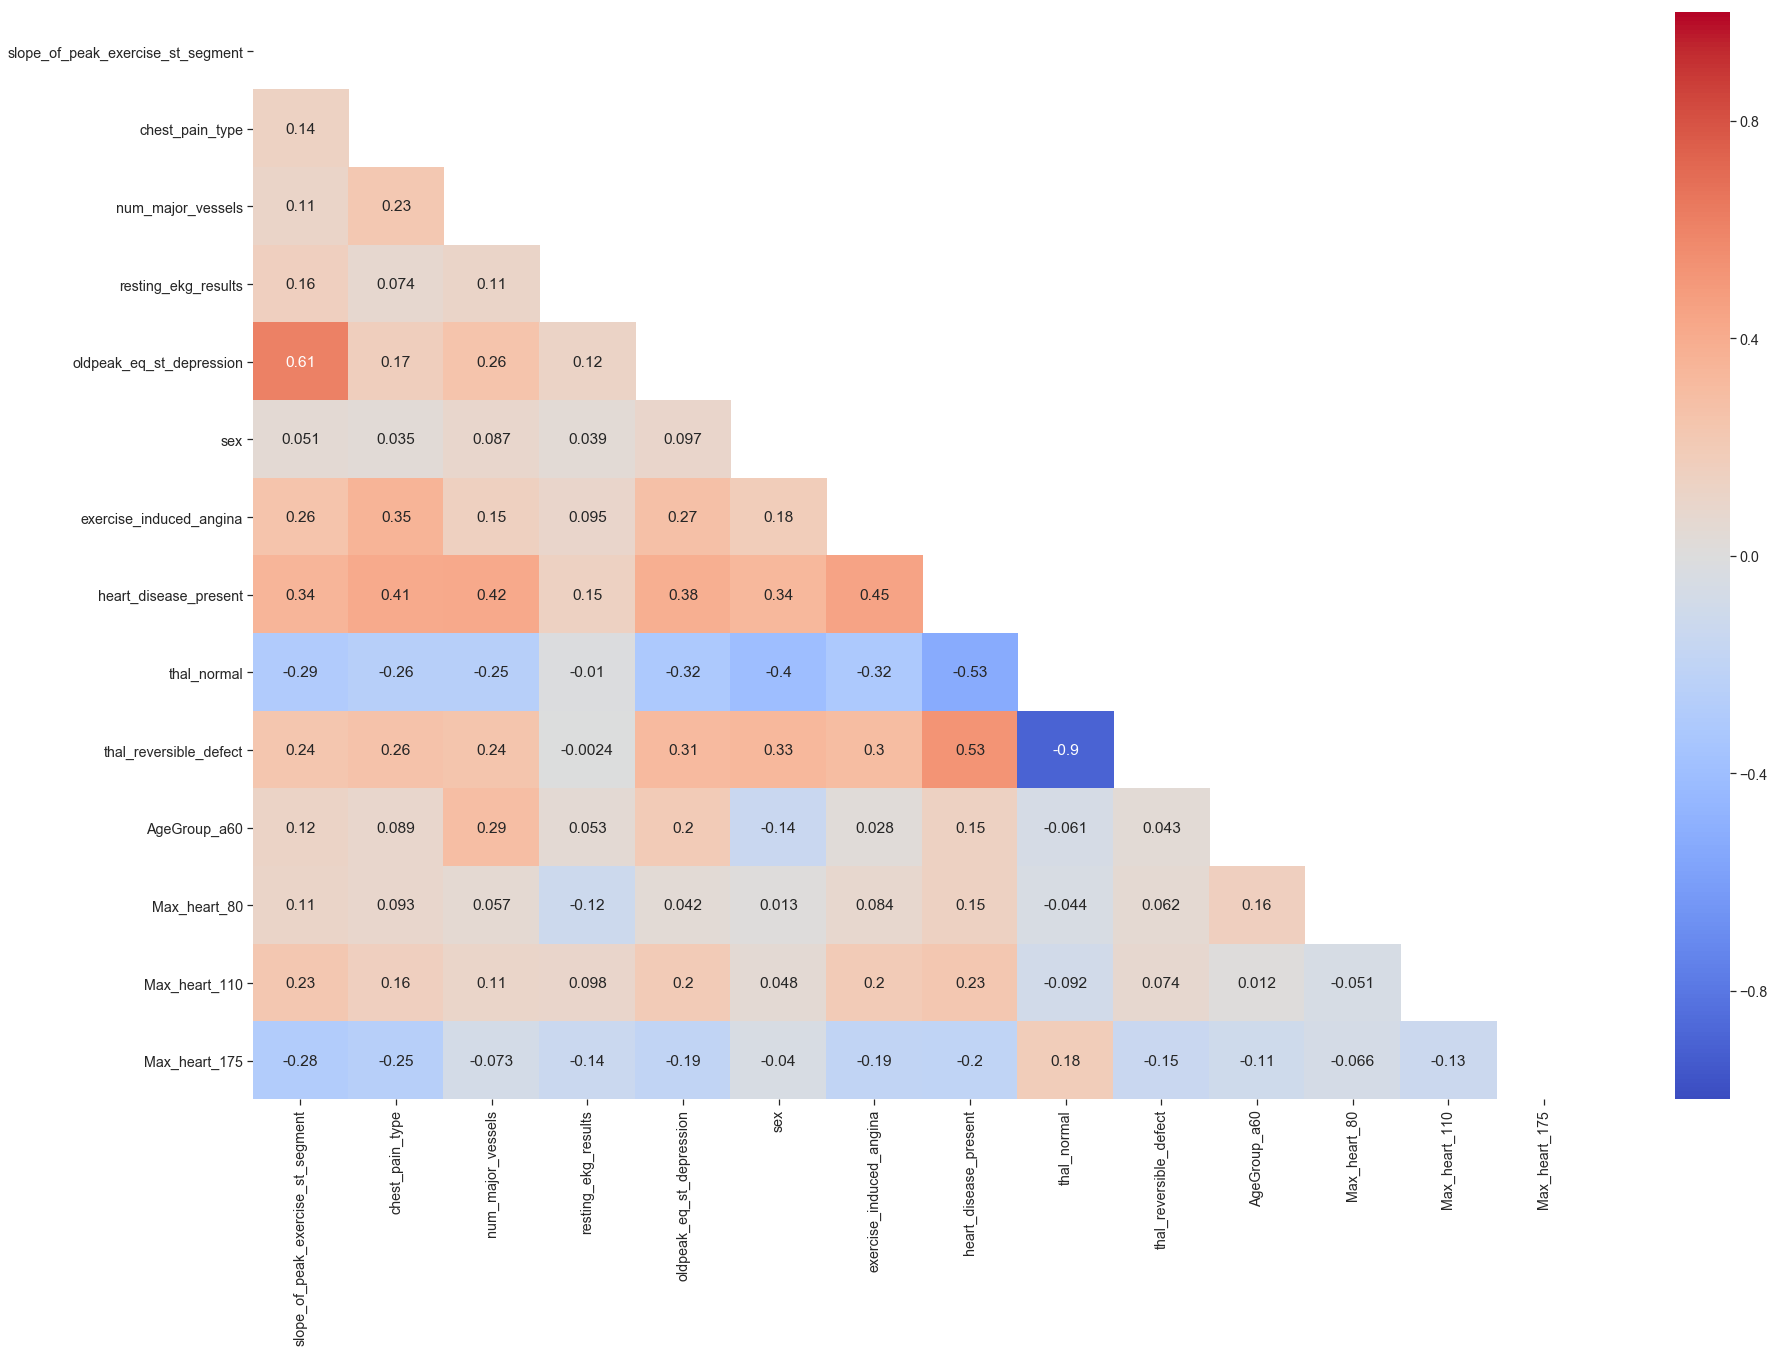

In [28]:
mask = np.zeros_like(heart_df_D_1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,20))
sns.heatmap(heart_df_D_1.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

In [29]:
df_Heart_train=heart_df_D_1[:len_train]
df__Heart_test=heart_df_D_1[len_train:]

## 2. Primera part on directament apliquem diferents models sobre el set d'entrenament i veiem amb quin seguirem treballant.
Es una primera aproximacio per escollir model.
El problema es que fent servir aquesta metodologia, no podem obtenit el log_loss (que es el metode de score que es fa servir). ...bé, primer mirem i desprès apliquem un altre mètode.

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import array
import sklearn.preprocessing as preproc


X_train=df_Heart_train[features_D_1].values
y_train=df_Heart_train['heart_disease_present'].values

#X_scaled = preproc.scale(X_train)
#y_train=array(df_Heart_train['heart_disease_present'])

#del df_Heart_train['heart_disease_present']
#del df_Heart_train['patient_id']

#X_train=array(df_Heart_train)

In [31]:
import sklearn.preprocessing as preproc

# Create pairwise interaction features, skipping the constant bias term
X2_train = preproc.PolynomialFeatures(include_bias=False).fit_transform(X_train)
X2b_train = preproc.PolynomialFeatures(include_bias=True).fit_transform(X_train)
X3_train = preproc.PolynomialFeatures(interaction_only=True, degree=3).fit_transform(X_train)
print (X_train.shape)
print (X2_train.shape)
print (X3_train.shape)


(180, 13)
(180, 104)
(180, 378)


In [32]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X3_train_smote, y_train_smote = sm.fit_sample(X3_train, y_train)
print (X3_train_smote.shape)

(200, 378)


In [33]:
# 2. Aqui apliquem els models sobre un 

In [34]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Analisis Models:
Fem algun plot dels resultats

# Refem analisi pero nomes tenint en compte els que funcionen be: SVC, NuSVC, GradientBoostingClassifier

### ara repetim pero fent servir dades preprocesssades (polynomial)

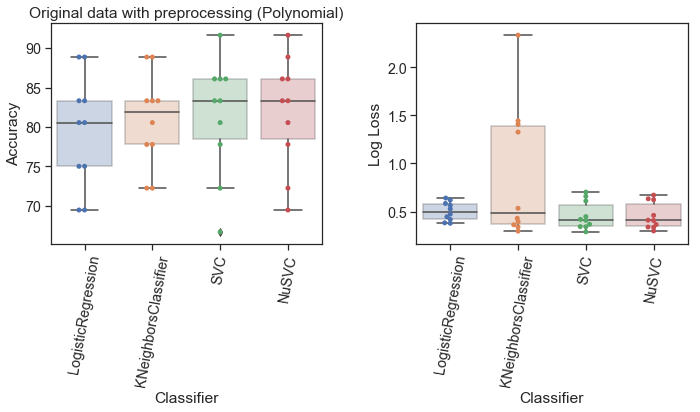

                       Accuracy  Log Loss
Classifier                               
KNeighborsClassifier  80.833333  0.886780
LogisticRegression    79.444444  0.503168
NuSVC                 81.944444  0.454124
SVC                   81.388889  0.458618
                       Accuracy  Log Loss
Classifier                               
KNeighborsClassifier  80.833333  0.738932
LogisticRegression    78.888889  0.491590
NuSVC                 82.222222  0.462670
SVC                   81.944444  0.454545
                       Accuracy  Log Loss
Classifier                               
KNeighborsClassifier  81.388889  1.003192
LogisticRegression    80.277778  0.434524
NuSVC                 82.222222  0.451574
SVC                   81.111111  0.431111
                      Accuracy  Log Loss
Classifier                              
KNeighborsClassifier     81.00  0.406272
LogisticRegression       83.75  0.372820
NuSVC                    82.75  0.399080
SVC                      83.00  0.36672

In [35]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
svm = LinearSVC()
 
classifiers = [
    LogisticRegression(C=.2,penalty='l1',tol=0.00001, solver='saga'),
    KNeighborsClassifier(15),
    #CalibratedClassifierCV(svm),
    SVC(probability=True, gamma='scale',decision_function_shape='ovo'),
    NuSVC(probability=True),
    #GaussianNB()
    #AdaBoostClassifier(),
    #GradientBoostingClassifier(),
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
log2 = pd.DataFrame(columns=log_cols)
log3 = pd.DataFrame(columns=log_cols)
log3_smote = pd.DataFrame(columns=log_cols)

for i in range (10):
    # dades originals
    xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.2, random_state=i*10)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name = clf.__class__.__name__
          
    
        train_predictions = clf.predict(xx_test)
        acc = accuracy_score(yy_test, train_predictions)
           
        train_predictions = clf.predict_proba(xx_test)
        ll = log_loss(yy_test, train_predictions)
            
        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)
        
    # dades X2
    xx_train, xx_test, yy_train, yy_test = train_test_split(X2_train, y_train, test_size=0.2, random_state=i*10)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name2 = clf.__class__.__name__
          
    
        train_predictions2 = clf.predict(xx_test)
        acc2 = accuracy_score(yy_test, train_predictions2)
           
        train_predictions2 = clf.predict_proba(xx_test)
        ll2 = log_loss(yy_test, train_predictions2)
            
        log_entry2 = pd.DataFrame([[name2, acc2*100, ll2]], columns=log_cols)
        log2 = log2.append(log_entry2)
        
    # dades X3
    xx_train, xx_test, yy_train, yy_test = train_test_split(X3_train, y_train, test_size=0.2, random_state=i*10)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name3 = clf.__class__.__name__
          
    
        train_predictions3 = clf.predict(xx_test)
        acc3 = accuracy_score(yy_test, train_predictions3)
           
        train_predictions3 = clf.predict_proba(xx_test)
        ll3 = log_loss(yy_test, train_predictions3)
            
        log_entry3 = pd.DataFrame([[name3, acc3*100, ll3]], columns=log_cols)
        log3 = log3.append(log_entry3)
        
    # dades X3
    xx_train, xx_test, yy_train, yy_test = train_test_split(X3_train_smote, y_train_smote, test_size=0.2, random_state=i*10)
    for clf in classifiers:
        clf.fit(xx_train, yy_train)
        name3_smote = clf.__class__.__name__
          
    
        train_predictions3_smote = clf.predict(xx_test)
        acc3_smote = accuracy_score(yy_test, train_predictions3_smote)
           
        train_predictions3_smote = clf.predict_proba(xx_test)
        ll3_smote = log_loss(yy_test, train_predictions3_smote)
            
        log_entry3_smote = pd.DataFrame([[name3_smote, acc3_smote*100, ll3_smote]], columns=log_cols)
        log3_smote = log3_smote.append(log_entry3_smote)
    
   

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=log['Accuracy'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Accuracy'],x=log['Classifier'])
plt.xticks(rotation=80)
plt.title('Original data with preprocessing (Polynomial)')


plt.subplot(1,2,2)
sns.boxplot(y=log['Log Loss'],x=log['Classifier'],  boxprops=dict(alpha=.3))
sns.swarmplot(y=log['Log Loss'],x=log['Classifier'])
plt.xticks(rotation=80)

plt.tight_layout()
plt.show()


print (log.groupby('Classifier').mean())
print (log2.groupby('Classifier').mean())
print (log3.groupby('Classifier').mean())
print (log3_smote.groupby('Classifier').mean())

En general sembla que 'ovo' millora resultats sempre

In [36]:
clf = SVC(probability=True, gamma='scale',decision_function_shape='ovo')
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
clf.fit(X3_train_smote, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
X_test=array(df__Heart_test)


In [39]:
targets = train_labels_df['heart_disease_present'].unique()

In [40]:
X3_test = preproc.PolynomialFeatures(interaction_only=True, degree=3).fit_transform(X_test)

predictions = pd.DataFrame()

# Make predictions from the fold as probabilities
probabilites = clf.predict_proba(X3_test)

# Record each prediction for each class as a separate column
for j in range(len(targets)):
    predictions[j] = probabilites[:,j]
    
# Add needed information for predictions 
predictions['patient_id'] = test_ids

# Find the class and associated probability
predictions['heart_disease_present'] = predictions[targets].idxmax(axis = 1)
predictions['confidence'] = predictions[targets].max(axis = 1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predictions.tail(10)

In [ ]:
submission= predictions[['patient_id',1]]
submission.columns = ['patient_id','heart_disease_present']

In [ ]:
submission.to_csv('Pablo_submission4.csv',index=False)